## Chargement du dataset

In [2]:
dataset = read.csv("../sources/original_dataset.csv")
names(dataset)
#dataset$loan_paid_back


[1] "age"                  "gender"               "marital_status"      
 [4] "education_level"      "annual_income"        "monthly_income"      
 [7] "employment_status"    "debt_to_income_ratio" "credit_score"        
[10] "loan_amount"          "loan_purpose"         "interest_rate"       
[13] "loan_term"            "installment"          "grade_subgrade"      
[16] "num_of_open_accounts" "total_credit_limit"   "current_balance"     
[19] "delinquency_history"  "public_records"       "num_of_delinquencies"
[22] "loan_paid_back"

## I-Qualité des données

### I-1/Complétude des données

In [3]:
colSums(is.na(dataset))

age               gender       marital_status 
                   0                    0                    0 
     education_level        annual_income       monthly_income 
                   0                    0                    0 
   employment_status debt_to_income_ratio         credit_score 
                   0                    0                    0 
         loan_amount         loan_purpose        interest_rate 
                   0                    0                    0 
           loan_term          installment       grade_subgrade 
                   0                    0                    0 
num_of_open_accounts   total_credit_limit      current_balance 
                   0                    0                    0 
 delinquency_history       public_records num_of_delinquencies 
                   0                    0                    0 
      loan_paid_back 
                   0

### I-1/ Conclusion
On remarque qu'il ne manque absolument aucune donnée (en même temps ce sont des données simulées) 
On a pas à se pencher sur la question de ce qu'il adviendra des données imcomplètes (quantifier le pb, supprimer les individus statistiques concernés, les compléter, emettre des réserves sur l'analyse...)

### I-2/ Recherche d'outliers

Visualisation de la répartion du loan_amount, variable explicative a priori importante

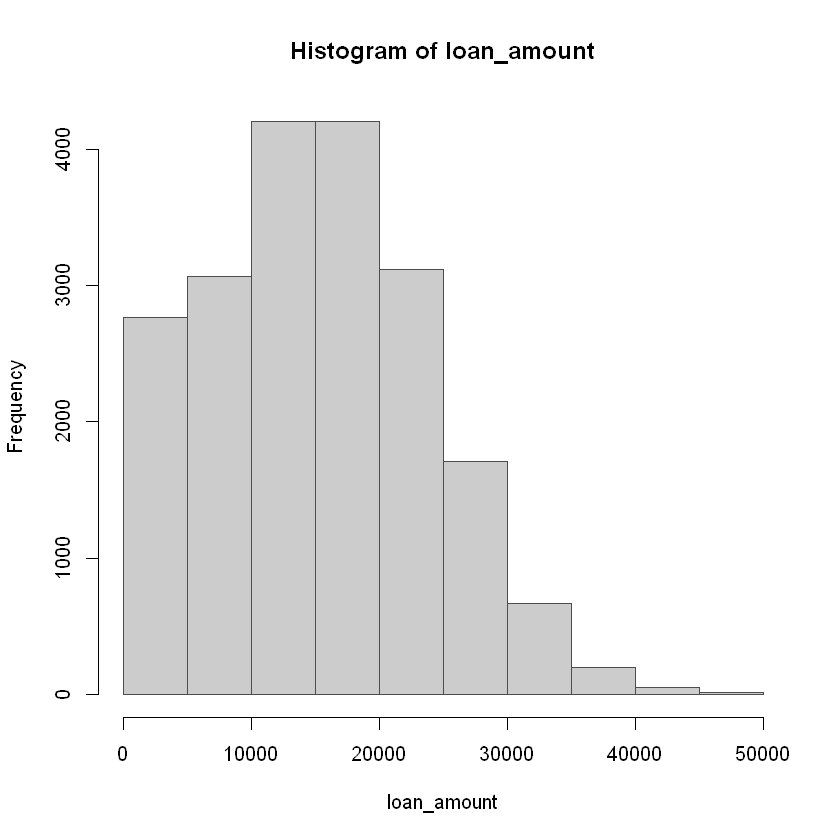

In [4]:
par(bg = "white")   # fond de la fenêtre graphique

hist(dataset$loan_amount,
     main = "Histogram of loan_amount",
     xlab = "loan_amount",
     col = "gray80",  # barres plus claires
     border = "gray30")



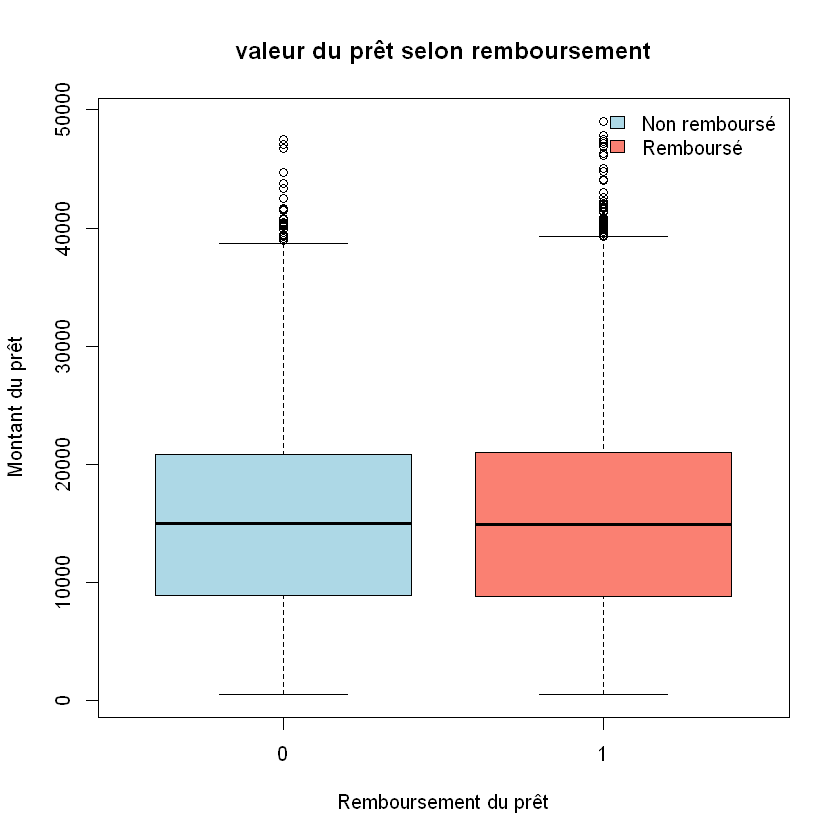

In [5]:
par(bg = "white")   # fond de la fenêtre graphique
boxplot(loan_amount ~ loan_paid_back,
        data = dataset,
        col = c("lightblue", "salmon"),
        main = "valeur du prêt selon remboursement",
        xlab = "Remboursement du prêt",
        ylab = "Montant du prêt")

legend("topright",
       legend = c("Non remboursé", "Remboursé"),
       fill   = c("lightblue", "salmon"),
       bty    = "n")


[1] "Outliers (lignes): 65, 69, 83, 95, 102, 111, 113, 120, 137, 154, 169, 179, 189, 206, 210, 228, 286, 320, 330, 337, 342, 346, 359, 386, 388, 390, 421, 424, 425, 426, 436, 444, 446, 448, 457, 458, 461, 484, 500, 520, 522, 538, 545, 586, 587, 596, 597, 607, 608, 613, 615, 660, 679, 699, 709, 710, 712, 759, 762, 805, 813, 843, 846, 861, 867, 871, 884, 892, 904, 922, 928, 977, 991, 1002, 1011, 1049, 1089, 1135, 1147, 1156, 1158, 1176, 1178, 1188, 1197, 1231, 1257, 1289, 1294, 1319, 1328, 1352, 1359, 1367, 1374, 1377, 1417, 1432, 1434, 1445, 1494, 1506, 1507, 1517, 1520, 1523, 1524, 1531, 1535, 1548, 1574, 1575, 1590, 1613, 1614, 1628, 1637, 1643, 1664, 1668, 1672, 1682, 1689, 1698, 1725, 1758, 1767, 1769, 1803, 1819, 1822, 1833, 1851, 1873, 1874, 1898, 1912, 1951, 1953, 1966, 1978, 1997, 2010, 2039, 2098, 2104, 2108, 2114, 2121, 2185, 2190, 2208, 2211, 2239, 2243, 2308, 2336, 2404, 2409, 2420, 2429, 2444, 2462, 2489, 2500, 2532, 2568, 2578, 2600, 2604, 2620, 2627, 2635, 2657, 2668, 268

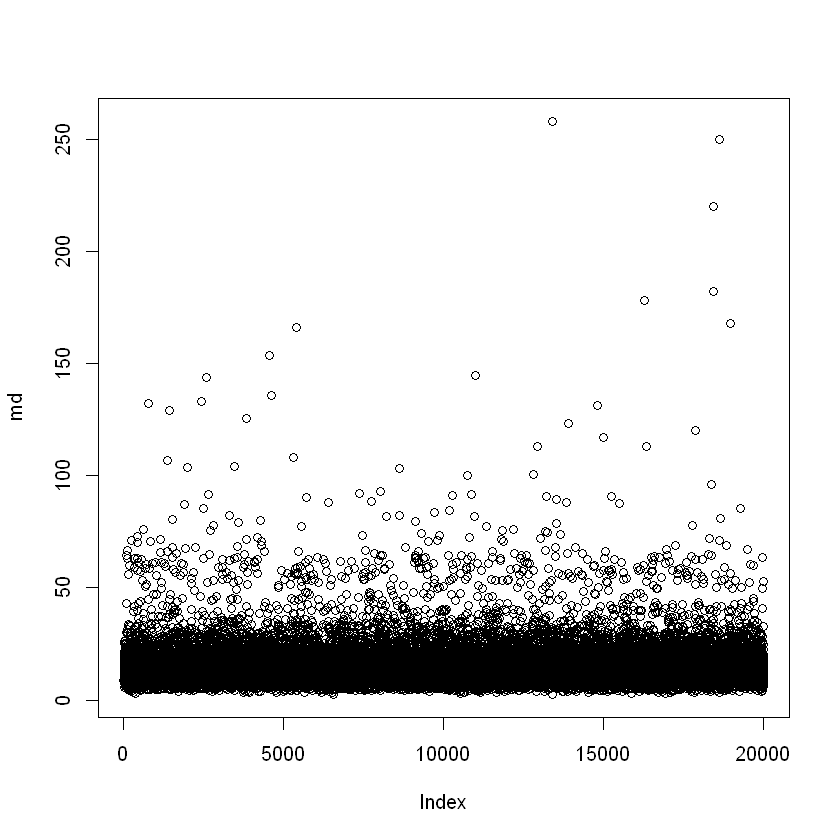

In [6]:
# Sélectionne variables numériques (adapte à ton dataset)
nums <- dataset[sapply(dataset, is.numeric)]
nums <- na.omit(nums)  # enlève NA

# Calcule distance
md <- mahalanobis(nums, colMeans(nums), cov(nums))
cutoff <- qchisq(0.975, df=ncol(nums))  # seuil ~2.5% outliers
outliers <- which(md > cutoff)

print(paste("Outliers (lignes):", paste(outliers, collapse=", ")))
print(sort(md, decreasing=TRUE)[1:10])  # top 10
par(bg = "white")   # fond de la fenêtre graphique
plot(md)


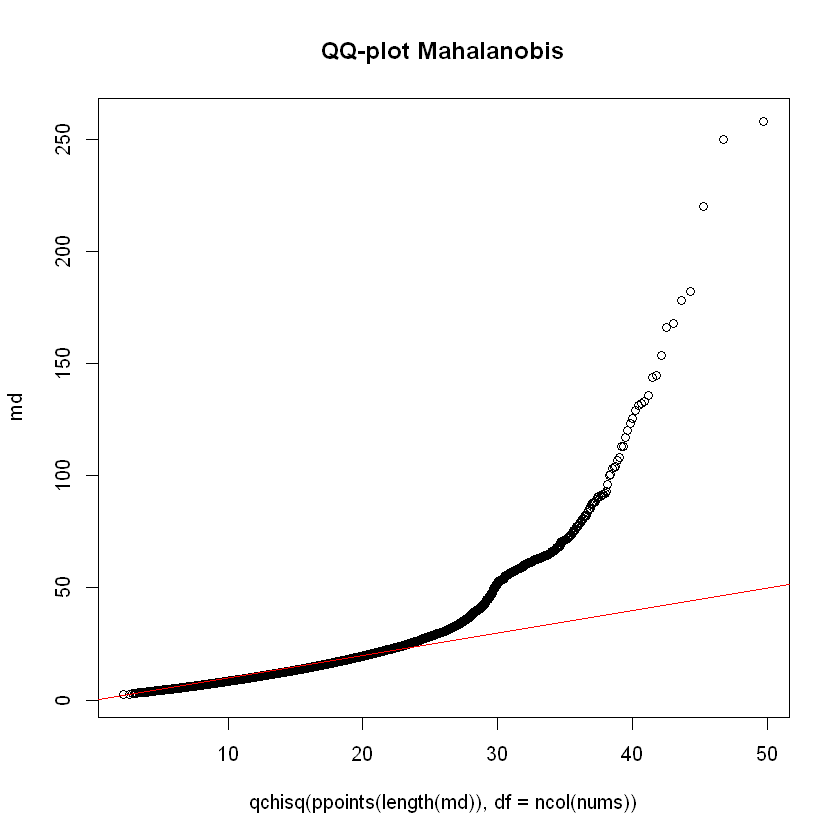

In [7]:
par(bg = "white")   # fond de la fenêtre graphique
qqplot(qchisq(ppoints(length(md)), df=ncol(nums)), md, main="QQ-plot Mahalanobis")
abline(0,1, col="red")


### I-3/ Equilibre du dataset
On cherchera à prédire un état (loan_paid_back) le mieux possible, il s'agit donc de vérifier si le dataset est équilibré pour cette variable. Si ce n'est pas le cas, il faudra être plus prudent lors de la mise en place de nos algo prédictifs afin de ne pas introduire de biais lié au dataset.

Warning message:
"package 'ggplot2' was built under R version 3.6.3"

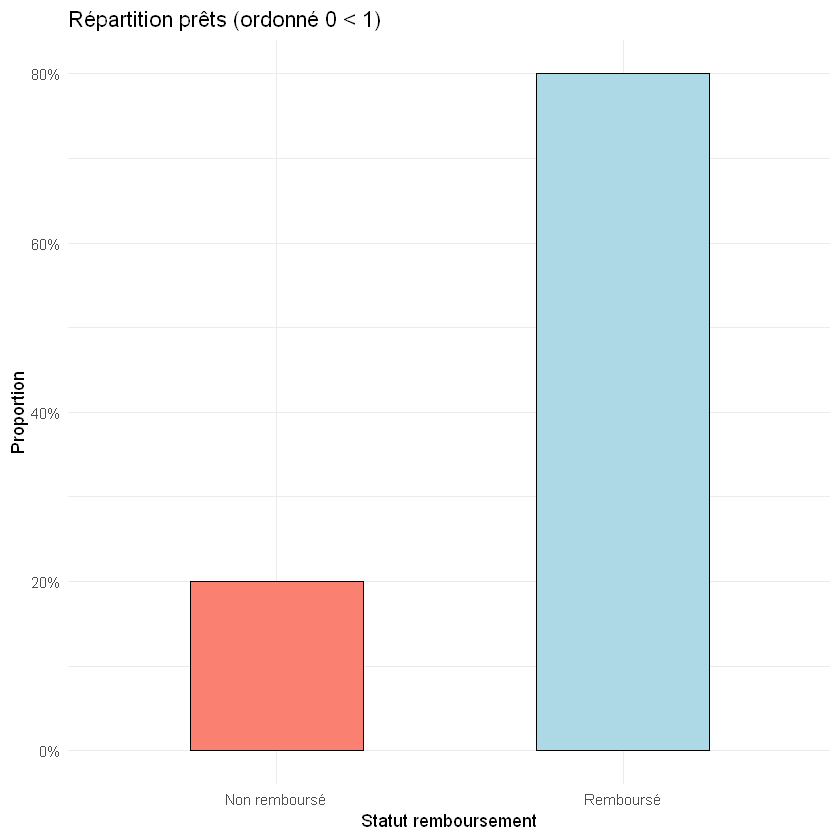

In [19]:
library(ggplot2)
dataset$paid_label <- factor(dataset$loan_paid_back, levels=c(0,1), 
                             labels=c("Non remboursé", "Remboursé"))

ggplot(dataset, aes(x=paid_label)) +
  geom_bar(aes(y=after_stat(prop), group=1), fill=c("salmon","lightblue"), 
           width=0.5, color="black") +
  labs(x="Statut remboursement", y="Proportion", 
       title="Répartition prêts (ordonné 0 < 1)") +
  scale_y_continuous(labels=scales::percent_format()) +
  theme_minimal()


### I-3/ Conclusion : 
Le dataset n'est pas équilibré. Pour les algo de machine learning il faudra être à l'affut